In [24]:
import itertools
import joblib
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the Params File

In [25]:
import yaml

with open("../params.yaml") as config_file:
    config = yaml.safe_load(config_file)

pprint(config)

NameError: name 'pprint' is not defined

# Load dataset

In [3]:
# Get data 

import pandas as pd
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
dataset = data.frame
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# print labels for target values 

[print(f'{target}: {label}') for target, label in zip(data.target.unique(), data.target_names)]

0: setosa
1: versicolor
2: virginica


[None, None, None]

In [5]:
# feature names

dataset.columns = [colname.strip(' (cm)').replace(' ', '_') for colname in dataset.columns.tolist()]

feature_names = dataset.columns.tolist()[:4]
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
# Save raw data
dataset_csv = '..' + config['data']['dataset_csv']
print(dataset_csv)
print(type(dataset_csv))
dataset.to_csv(dataset_csv, index=False)

../data/raw/iris.csv
<class 'str'>


# Features engineering

In [7]:
dataset['sepal_length_to_sepal_width'] = dataset['sepal_length'] / dataset['sepal_width']
dataset['petal_length_to_petal_width'] = dataset['petal_length'] / dataset['petal_width']

dataset = dataset[[
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
#     'sepal_length_in_square', 'sepal_width_in_square', 'petal_length_in_square', 'petal_width_in_square',
    'sepal_length_to_sepal_width', 'petal_length_to_petal_width',
    'target'
]]

In [8]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_to_sepal_width,petal_length_to_petal_width,target
0,5.1,3.5,1.4,0.2,1.457143,7.0,0
1,4.9,3.0,1.4,0.2,1.633333,7.0,0
2,4.7,3.2,1.3,0.2,1.468750,6.5,0
3,4.6,3.1,1.5,0.2,1.483871,7.5,0
4,5.0,3.6,1.4,0.2,1.388889,7.0,0


In [9]:
# Save features
features_path = '..' + config['data']['features_path']
dataset.to_csv(features_path, index=False)

# Split dataset

In [10]:
random_state = 42
test_size = config['data']['test_size']

train_dataset, test_dataset = train_test_split(dataset, test_size=test_size, random_state=random_state)
train_dataset.shape, test_dataset.shape

((120, 7), (30, 7))

In [11]:
# Save train and test sets
trainset_path = '..' + config['data']['trainset_path']
testset_path = '..' + config['data']['trainset_path']

train_dataset.to_csv(trainset_path)
test_dataset.to_csv(testset_path)

# Train

In [12]:
# Get X and Y

y_train = train_dataset.loc[:, 'target'].values.astype('int32')
X_train = train_dataset.drop('target', axis=1).values.astype('float32')

In [13]:
# Create an instance of Logistic Regression Classifier CV and fit the data
clf_params = {
    'C': 0.001,
    'solver': 'lbfgs',
    'multi_class': 'multinomial',
    'max_iter': 100
}

logreg = LogisticRegression(**config['train']['clf_params'], random_state=random_state)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.001, multi_class='multinomial', random_state=42)

In [14]:
model_path= '..' + config['train']['model_path']
joblib.dump(logreg, model_path)

['../models/model.joblib']

# Evaluate

In [15]:
# Get X and Y

y_test = test_dataset.loc[:, 'target'].values.astype('int32')
X_test = test_dataset.drop('target', axis=1).values.astype('float32')

In [16]:
prediction = logreg.predict(X_test)
cm = confusion_matrix(prediction, y_test)
f1 = f1_score(y_true = y_test, y_pred = prediction, average='macro')

In [17]:
# f1 score value
f1

0.9305555555555555

In [18]:
# Save metrics
metrics_file = '..' + config['reports']['metrics_file']

metrics = {
    'f1': f1
}

with open(metrics_file, 'w') as mf:
    json.dump(
        obj=metrics,
        fp=mf,
        indent=4
    )

In [31]:
from src.report.visualize import plot_confusion_matrix

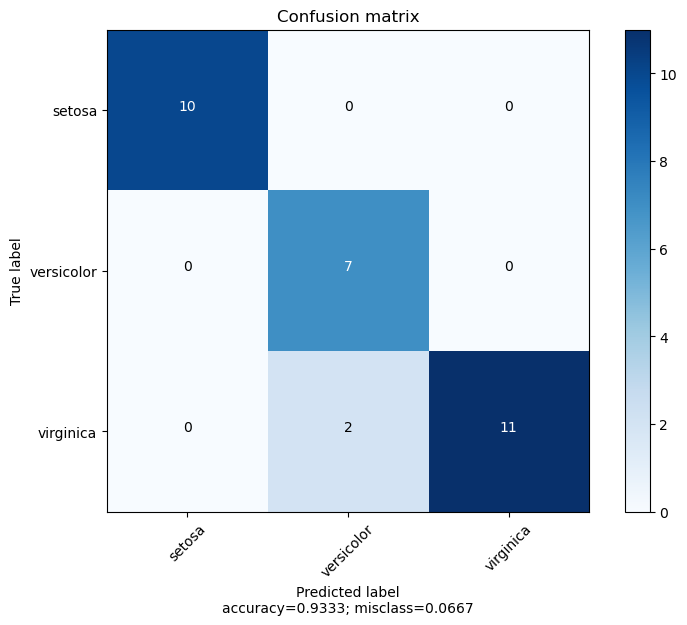

In [32]:
cm_plot = plot_confusion_matrix(cm, data.target_names, normalize=False)

In [33]:
type(cm_plot)

NoneType

In [34]:
# Save confusion matrix image
confusion_matrix_image = '..' + config['reports']['confusion_matrix_image']
cm_plot.savefig(confusion_matrix_image)

AttributeError: 'NoneType' object has no attribute 'savefig'